In [19]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sympy as sp

x = sp.Symbol('x')
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')

class regressao:
    def __init__(self, xx, yy, func, coefs):
        self.func = sp.lambdify([x, *coefs], func)
        if func.has(sp.exp):
            yy = np.log(yy)
            func = sp.log(func).expand(force=True)
        elif func.is_rational_function():
            yy = 1/yy
            func = (1/func).expand(force=True)            
        func = sp.lambdify([x, *coefs], func)
        self.coef, _ = opt.curve_fit(func, xx, yy)

#def regressao(xx, yy, func, coef):
    #M*k=w    
    
#    def somatorio(funcao):
        #f = sp.lambdify(x, funcao)(2))
#        soma = 0
#        for i in range(len(xx)):
#            soma = soma + funcao.subs(x, xx[i]).subs(yS, yy[i])
#        return float(soma)

    #yS = sp.Symbol('y')
    #residuo2 = (func - yS)**2
    #M = np.zeros((len(coef),(len(coef))), dtype=float)
    #w = np.zeros(len(coef), dtype=float)
    #for i in range(len(coef)):
    #    dres = residuo2.diff(coef[i]).expand()
    #    w[i] = -somatorio(sp.collect(dres, yS).coeff(yS) * yS)
    #    for j in range(len(coef)):
    #        M[i, j] = somatorio(sp.collect(dres, coef[j]).coeff(coef[j]))
    #return np.linalg.solve(M,w)

### 1) Qual reta melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\sin(x)$. 

0.851818933501325*x + 0.0298978951569476


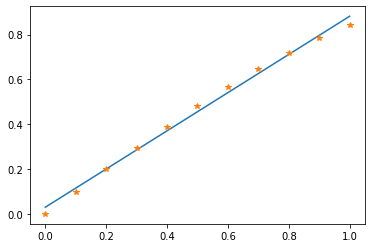

In [14]:
x1 = np.arange(0, 1.1, 0.1)
y1 = np.sin(x1)
fit1 = np.poly1d(np.polyfit(x1, y1, 1))
fit1(x)
plt.plot(x1, fit1(x1))
plt.plot(x1, y1, '*')
print(fit1(x).expand())

### 2) Qual parábola melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\sin(x)$. 

-0.234758599382244*x**2 + 1.08657753288357*x - 0.00531589475038914


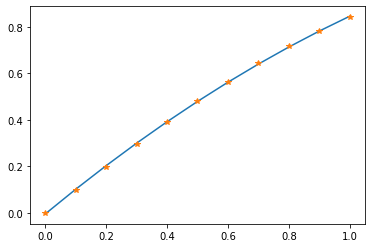

In [15]:
x2 = np.arange(0, 1.1, 0.1)
y2 = np.sin(x1)
fit2 = np.poly1d(np.polyfit(x2, y2, 2))
fit2(x).expand()
plt.plot(x2, fit2(x2))
plt.plot(x2, y2, '*')
print(fit2(x).expand())

### 3) Qual reta no formato y=kx melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\sin(x)$. 

0.894530212327761*x

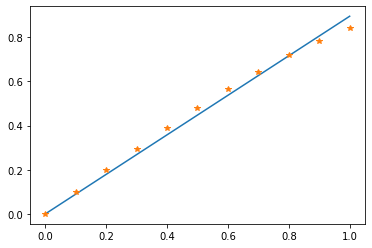

In [18]:
x3 = np.arange(0, 1.1, 0.1)
y3 = np.sin(x2)

def func3(x, k):
    return k*x

fit3, _ = opt.curve_fit(func3, x3, y3)
plt.plot(x3, func3(x3, *fit3))
plt.plot(x3, y3, '*')
func3(x, *fit3)

### 4) Qual parábola melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\cos(x)$. 

-0.429722733735614*x**2 - 0.0356280705322429*x + 1.00256677151161


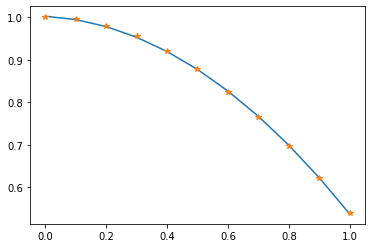

In [91]:
x4 = np.arange(0, 1.1, 0.1)
y4 = np.cos(x4)
fit4 = np.poly1d(np.polyfit(x4, y4, 2))
print(fit4(x).expand())
plt.plot(x4, fit4(x4))
plt.plot(x4, y4, '*')

### 5) Qual parábola do tipo y=a+bx^2 melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\cos(x)$. 

0.996320291601153 - 0.462772891885103*x**2

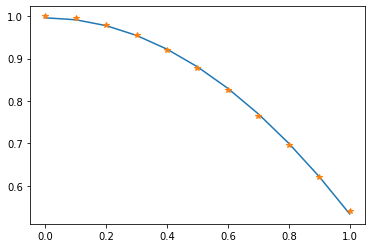

In [55]:
x5 = np.arange(0, 1.1, 0.1)
y5 = np.cos(x5)

def func5(x, a, b):
    return a + b*x**2

fit5, _ = opt.curve_fit(func5, x5, y5)
plt.plot(x5, func5(x5, *fit5))
plt.plot(x5, y5, '*')
func5(x, *fit5)

### 6) Qual curva no formato $y=C exp(a x)$ melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\sin(x)+1$. 

1.05610085780747*exp(0.605482716602375*x)

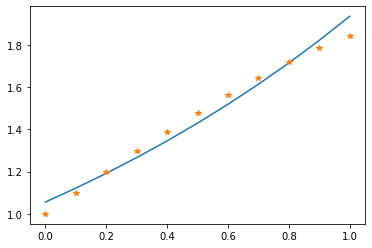

In [87]:
x6 = np.arange(0, 1.1, 0.1)
y6 = np.sin(x6)+1
f6 = c*sp.exp(a*x)

fit6 = regressao(x6, y6, f6, [c, a])
display(f6.subs(c, fit6.coef[0]).subs(a, fit6.coef[1]))
plt.plot(x6, fit6.coef[0]*np.exp(fit6.coef[1]*x6))
plt.plot(x6, y6, '*')
plt.show()

### 7) Qual hipérbole no formato $y=1 ./ (a+bx)$ melhor se ajusta aos pontos com coordenadas $x=0:0.1:1$ e $y=\sin(x)+1$.


1/(0.933249138933051 - 0.440236230361965*x)

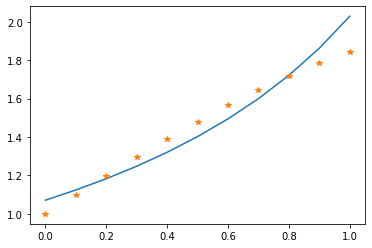

In [18]:
from sympy.polys import polyclasses
x7 = np.arange(0, 1.1, 0.1)
y7 = np.sin(x7) + 1
f7 = 1/(a+b*x)
fit7 = regressao(x7, y7, f7, [a, b])
display(f7.subs(a, fit7.coef[0]).subs(b, fit7.coef[1]))
plt.plot(x7, 1/(fit7.coef[0]+fit7.coef[1]*x7))
plt.plot(x7, y7, '*')
plt.show()

### 8) Qual o polinômio de grau 2 que melhor aproxima os pontos $x=[0, 1, 2, 3, 5, 7, 8, 10]$ e $y=[8, 5, 4, 2, 1, 2, 4,7]$? 

0.253446115288221*x**2 - 2.57821637426901*x + 7.74342105263158


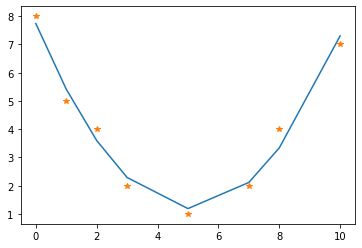

In [92]:
x8 = np.array([0, 1, 2, 3, 5, 7, 8, 10])
y8 = np.array([8, 5, 4, 2, 1, 2, 4, 7])
fit8 = np.poly1d(np.polyfit(x8, y8, 2))
print(fit8(x).expand())
plt.plot(x8, fit8(x8))
plt.plot(x8, y8, '*')

### 9) Dados os pontos $x=[0, 1, 2, 3, 5, 7, 8, 10]$ e $y=[8, 5, 4, 2, 1, 2, 4,7]$, encontre o polinômio de grau 3 que melhor se ajusta a esses pontos. 

-0.00636432860876038*x**3 + 0.349365639320252*x**2 - 2.94204382640314*x + 7.96299038963381


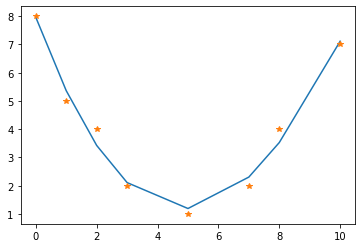

In [16]:
x9 = np.array([0, 1, 2, 3, 5, 7, 8, 10])
y9 = np.array([8, 5, 4, 2, 1, 2, 4, 7])
fit9 = np.poly1d(np.polyfit(x9, y9, 3))
print(fit9(x).expand())
plt.plot(x9, fit9(x9))
plt.plot(x9, y9, '*')
plt.show()

### 10) Dados os pontos $x=[0, 1, 2, 3, 5, 7, 8, 10]$ e $y=[8, 5, 4, 2, 1, 2, 4, 7]$, encontre o polinômio de grau 3 que melhor se ajusta a esses pontos. Qual o resíduo em $x=5$? 

In [11]:
fit9(5)-1

0.19137116452936187

### 11) Dados os pontos $x=[0, 1, 2, 3, 5, 7, 8, 10]$ e $y=[8, 5, 4, 2, 1, 2, 4,7]$, encontre o polinômio de grau 3 que melhor se ajusta a esses pontos. Calcule a norma 2 do resíduo, $\|y-p(x)\|_2$? 

In [12]:
np.linalg.norm(y9 - fit9(x9), 2)

0.917462661718712